<a href="https://colab.research.google.com/github/Mrsth/Linear_regression/blob/master/Sk_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Pandas and data pre-processing**

In [94]:
import pandas as pd

auto_mobile = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/Automobile_data.csv")
auto_mobile.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


**Checking if there are an null values**

In [95]:
auto_mobile.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

**Locating the null value examples/rows**

In [96]:
auto_mobile.loc[auto_mobile['price'].isnull()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


**Creating dataset with no null values**

In [97]:
auto_mobile1 = auto_mobile[pd.notnull(auto_mobile['price'])]
auto_mobile1.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64

# **Data visualization**

In [98]:
import seaborn as sns

In [99]:
auto_mobile1.head(10)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0


In [100]:
auto_mobile1["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

**Relation between horsepower and average mileage with price**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


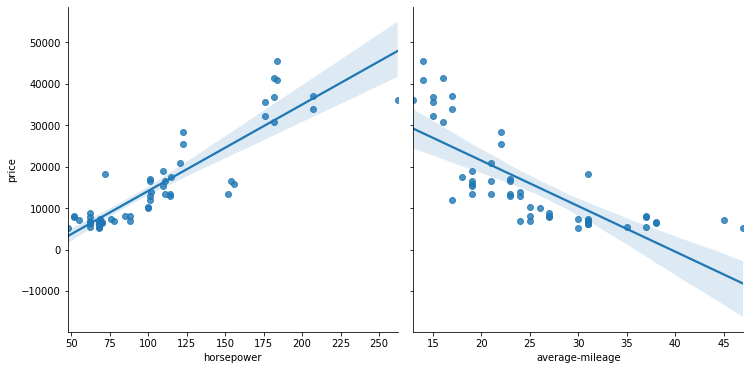

In [101]:
sns.pairplot(auto_mobile1, x_vars=["horsepower", "average-mileage"], y_vars=["price"], size=5, kind="reg")

**Relation between engine type and number of cylinder**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


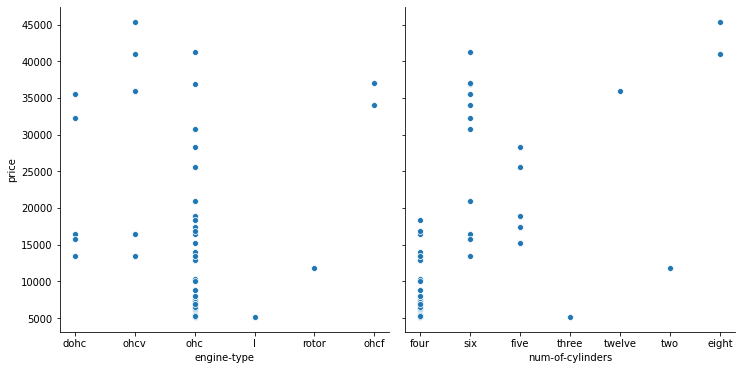

In [102]:
sns.pairplot(auto_mobile1, x_vars=["engine-type",	"num-of-cylinders"], y_vars=["price"], size=5, kind="scatter")

# **Spliting data in train data and test data**

In [103]:
from sklearn.model_selection import train_test_split

x = auto_mobile1[["wheel-base","length", "horsepower",	"average-mileage"]]
y = auto_mobile1.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
prediction = model.predict(x_test)
x_test # 15 for test

,wheel-base,length,horsepower,average-mileage
43,94.5,170.2,69,31
0,88.6,168.8,111,21
41,94.5,165.3,69,31
21,94.3,170.7,78,24
24,113.0,199.6,176,15
29,93.1,159.1,68,31
27,93.1,159.1,68,30
53,95.7,169.7,62,27
17,93.7,157.3,68,31
44,100.4,184.6,152,19


In [106]:
import matplotlib.pyplot as plt

reg_line = {"Y_test": y_test, "prediction":prediction}
reg_df = pd.DataFrame(reg_line)
reg_df

,Y_test,prediction
43,7349.0,6789.900127
0,13495.0,10385.114627
41,6649.0,6798.442983
21,6785.0,7523.564403
24,32250.0,35763.136966
29,6795.0,5836.249661
27,5195.0,5707.113796
53,8778.0,5580.702394
17,6229.0,6173.069265
44,13499.0,24632.617858


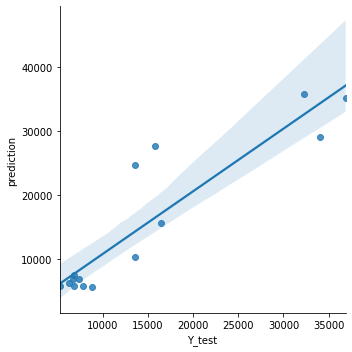

In [107]:
sns.lmplot(x="Y_test", y="prediction", data=reg_df, aspect=1)

# **Model Validation**

In [113]:
from sklearn import metrics
import math

print("Mean Squared Error = ", metrics.mean_squared_error(y_test,prediction))
print("Root Mean Squared Error = ", math.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Squared Error =  22176527.91890347
Root Mean Squared Error =  4709.196101130581
